In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-dataaa/Arial/4.png
/kaggle/input/digit-dataaa/Arial/9.png
/kaggle/input/digit-dataaa/Arial/1.png
/kaggle/input/digit-dataaa/Arial/2.png
/kaggle/input/digit-dataaa/Arial/7.png
/kaggle/input/digit-dataaa/Arial/5.png
/kaggle/input/digit-dataaa/Arial/3.png
/kaggle/input/digit-dataaa/Arial/8.png
/kaggle/input/digit-dataaa/Arial/6.png
/kaggle/input/digit-dataaa/Arial/0.png
/kaggle/input/digit-dataset/templeteT.png
/kaggle/input/digit-dataset/ArialT-20250606T111958Z-1-001/ArialT/4.png
/kaggle/input/digit-dataset/ArialT-20250606T111958Z-1-001/ArialT/9.png
/kaggle/input/digit-dataset/ArialT-20250606T111958Z-1-001/ArialT/1.png
/kaggle/input/digit-dataset/ArialT-20250606T111958Z-1-001/ArialT/2.png
/kaggle/input/digit-dataset/ArialT-20250606T111958Z-1-001/ArialT/7.png
/kaggle/input/digit-dataset/ArialT-20250606T111958Z-1-001/ArialT/5.png
/kaggle/input/digit-dataset/ArialT-20250606T111958Z-1-001/ArialT/3.png
/kaggle/input/digit-dataset/ArialT-20250606T111958Z-1-001/ArialT/8.png


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [3]:
dataset_path = '/kaggle/input/digit-dataaa/Arial'

templates = {}
for digit in range(10):
    template_path = os.path.join(dataset_path, f"{digit}.png")
    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
    templates[str(digit)] = template


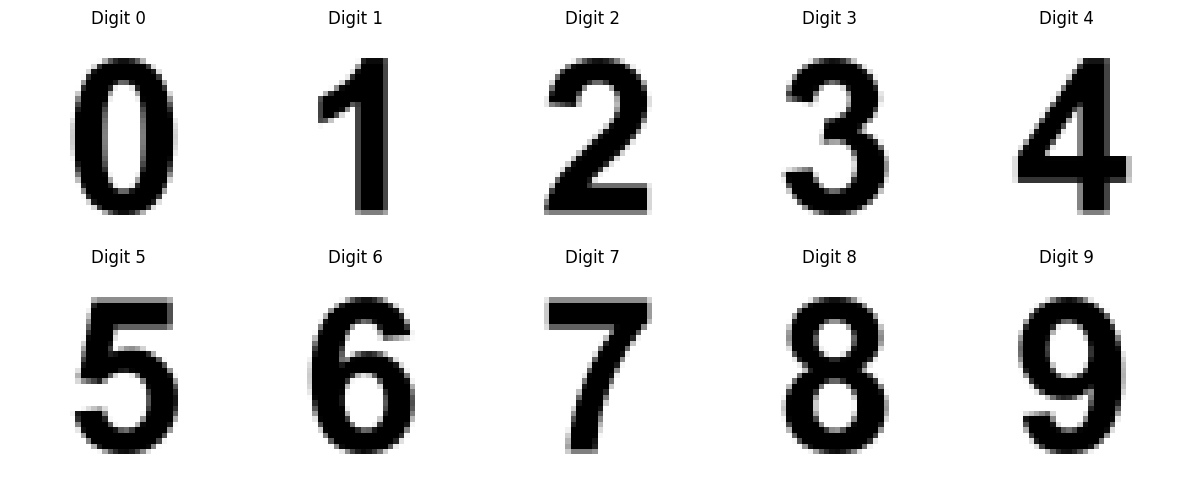

In [4]:
fig, axs = plt.subplots(2, 5, figsize=(12, 5))

for digit in range(10):
    img_path = os.path.join(dataset_path, f"{digit}.png")
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    if img is None:
        print(f"Failed to load image: {img_path}")
        continue
    
    ax = axs[digit // 5, digit % 5]
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Digit {digit}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [5]:
dataset_path_templates = '/kaggle/input/digit-dataaa/Arial'
full_image_path = '/kaggle/input/digit-dataset/templeteT.png'


In [6]:
def detect_best_digit_match(image, digit_template, digit_label='?', threshold=0.6):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, img_gray = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
    _, digit_template = cv2.threshold(digit_template, 127, 255, cv2.THRESH_BINARY)

    best_val = -1
    best_pt = None
    best_scale = 1.0
    best_shape = None

    for scale in np.linspace(0.3, 1.3, 20):  # wider range to adapt to small digits
        scaled_template = cv2.resize(digit_template, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
        th, tw = scaled_template.shape[:2]

        if th > img_gray.shape[0] or tw > img_gray.shape[1]:
            continue

        res = cv2.matchTemplate(img_gray, scaled_template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

        if max_val > best_val:
            best_val = max_val
            best_pt = max_loc
            best_scale = scale
            best_shape = (tw, th)

    img_draw = image.copy()
    if best_val >= threshold:
        top_left = best_pt
        bottom_right = (top_left[0] + best_shape[0], top_left[1] + best_shape[1])
        cv2.rectangle(img_draw, top_left, bottom_right, (0, 255, 0), 2)
        cv2.putText(img_draw, digit_label, (top_left[0], top_left[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    else:
        print("❌ No good match found (confidence below threshold)")

    print(f"✅ Best Match Confidence: {best_val:.4f} at scale {best_scale:.2f}")
    return img_draw


In [7]:
full_image_path2='/kaggle/input/digit-data/templete.png'


Processing on: templeteT.png
✅ Best Match Confidence: 0.8577 at scale 0.72
✅ Saved: templateT_digit0.png


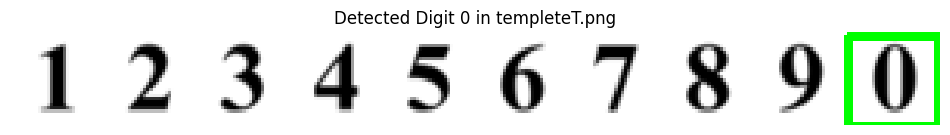

✅ Best Match Confidence: 0.8177 at scale 0.67
✅ Saved: templateT_digit1.png


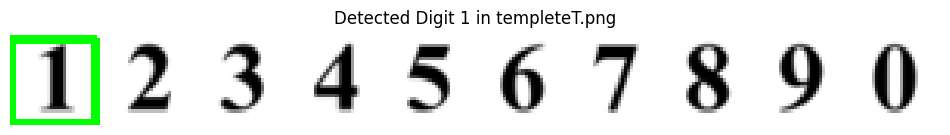

✅ Best Match Confidence: 0.7880 at scale 0.72
✅ Saved: templateT_digit2.png


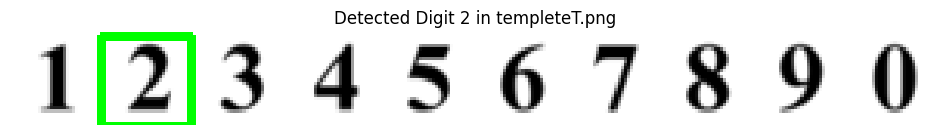

✅ Best Match Confidence: 0.7259 at scale 0.72
✅ Saved: templateT_digit3.png


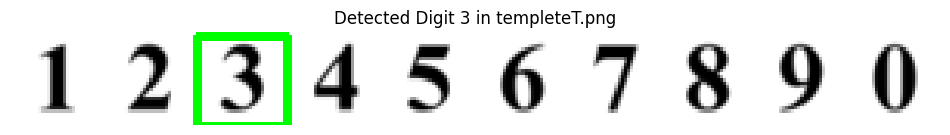

✅ Best Match Confidence: 0.8845 at scale 0.67
✅ Saved: templateT_digit4.png


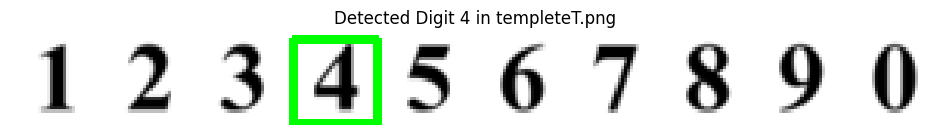

✅ Best Match Confidence: 0.7786 at scale 0.72
✅ Saved: templateT_digit5.png


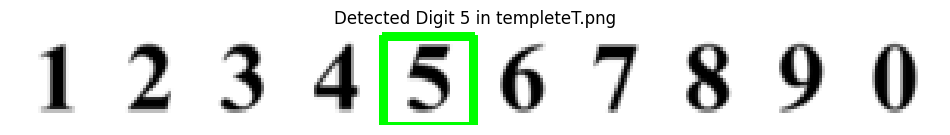

✅ Best Match Confidence: 0.7963 at scale 0.72
✅ Saved: templateT_digit6.png


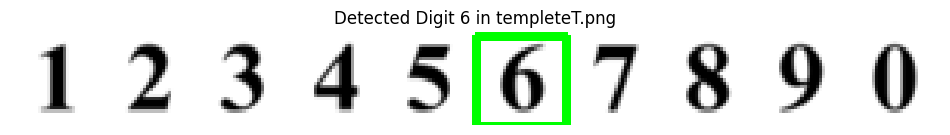

✅ Best Match Confidence: 0.8139 at scale 0.72
✅ Saved: templateT_digit7.png


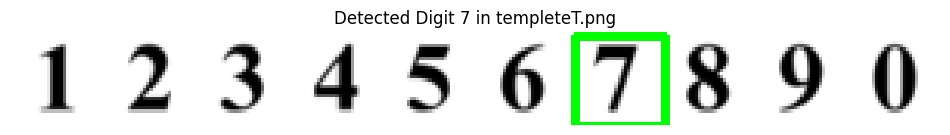

✅ Best Match Confidence: 0.8008 at scale 0.72
✅ Saved: templateT_digit8.png


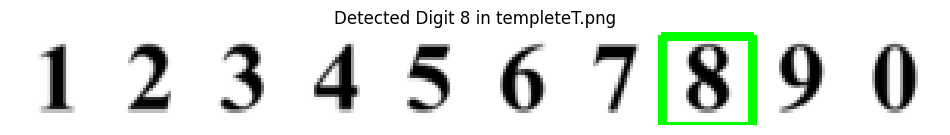

✅ Best Match Confidence: 0.7807 at scale 0.72
✅ Saved: templateT_digit9.png


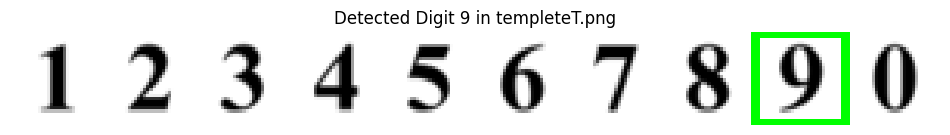


Processing on: templete.png
✅ Best Match Confidence: 0.8960 at scale 0.98
✅ Saved: template_digit0.png


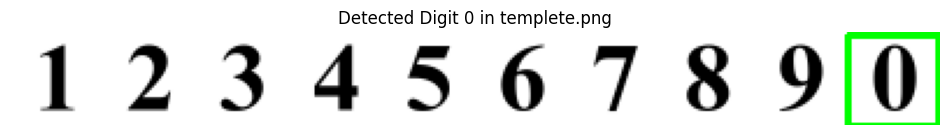

✅ Best Match Confidence: 0.8157 at scale 0.93
✅ Saved: template_digit1.png


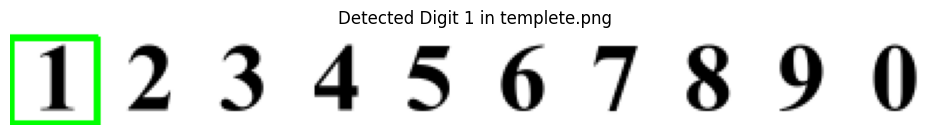

✅ Best Match Confidence: 0.8019 at scale 0.93
✅ Saved: template_digit2.png


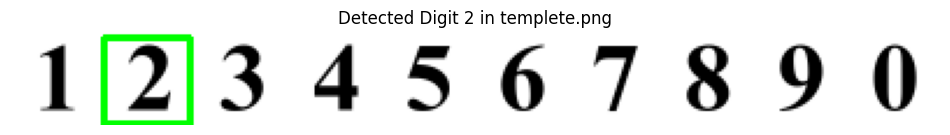

✅ Best Match Confidence: 0.7615 at scale 0.98
✅ Saved: template_digit3.png


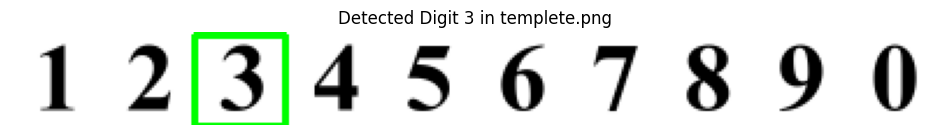

✅ Best Match Confidence: 0.8757 at scale 0.93
✅ Saved: template_digit4.png


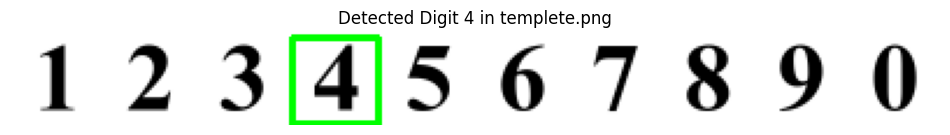

✅ Best Match Confidence: 0.7544 at scale 0.98
✅ Saved: template_digit5.png


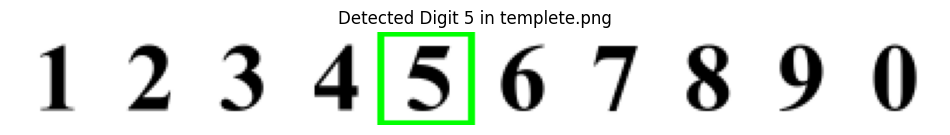

✅ Best Match Confidence: 0.7837 at scale 0.93
✅ Saved: template_digit6.png


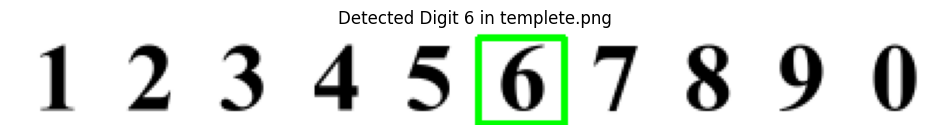

✅ Best Match Confidence: 0.8029 at scale 0.98
✅ Saved: template_digit7.png


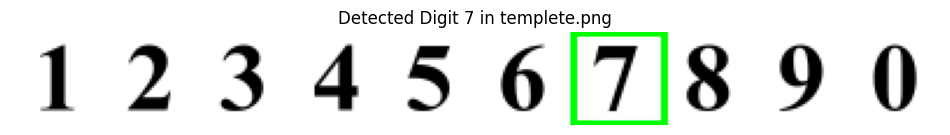

✅ Best Match Confidence: 0.7963 at scale 0.98
✅ Saved: template_digit8.png


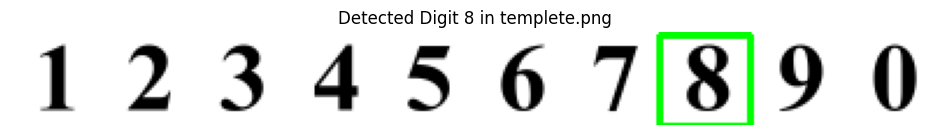

✅ Best Match Confidence: 0.7842 at scale 0.93
✅ Saved: template_digit9.png


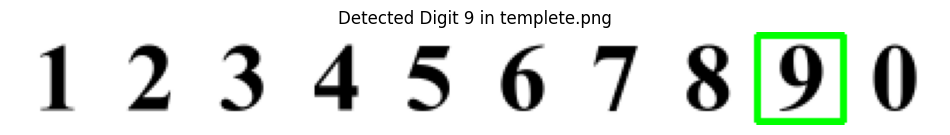

In [9]:
output_dir = '/kaggle/working/processed_results'
os.makedirs(output_dir, exist_ok=True)

full_image_paths = {
    "T": '/kaggle/input/digit-dataset/templeteT.png',
    "": '/kaggle/input/digit-data/templete.png'
}

dataset_path_templates = '/kaggle/input/digit-dataaa/Arial'

for suffix, full_image_path in full_image_paths.items():
    full_image = cv2.imread(full_image_path)

    if full_image is None:
        print(f"Failed to load: {full_image_path}")
        continue

    print(f"\nProcessing on: {os.path.basename(full_image_path)}")

    for digit in range(10):
        input_digit_file = f'{digit}.png'
        
        digit_path = os.path.join(dataset_path_templates, input_digit_file)
        digit_template = cv2.imread(digit_path, cv2.IMREAD_GRAYSCALE)
        
        if digit_template is None:
            print(f"Template not found for digit {digit}")
            continue
        
        digit_label = str(digit)
        result_image = detect_best_digit_match(full_image, digit_template, digit_label=digit_label, threshold=0.7)

        output_filename = f"template{suffix}_digit{digit}.png"  # E.g., templateT_digit7.png
        output_path = os.path.join(output_dir, output_filename)
        cv2.imwrite(output_path, result_image)
        print(f"✅ Saved: {output_filename}")
        
        result_rgb = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(12, 6))
        plt.imshow(result_rgb)
        plt.title(f"Detected Digit {digit_label} in templete{suffix}.png")
        plt.axis('off')
        plt.show()
